In [4]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
!pip install squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
# reading the dataset

data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1056,grated cheese,herb & pepper,mineral water,soup,eggs,cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,cottage cheese,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,nonfat milk,tomato juice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,burgers,frozen vegetables,mineral water,milk,fromage blanc,cake,cooking oil,pet food,green tea,sparkling water,mayonnaise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,herb & pepper,ground beef,spaghetti,french fries,escalope,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3335,parmesan cheese,hot dogs,energy drink,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2459,whole wheat rice,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3731,pancakes,honey,barbecue sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5540,vegetables mix,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,chocolate,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


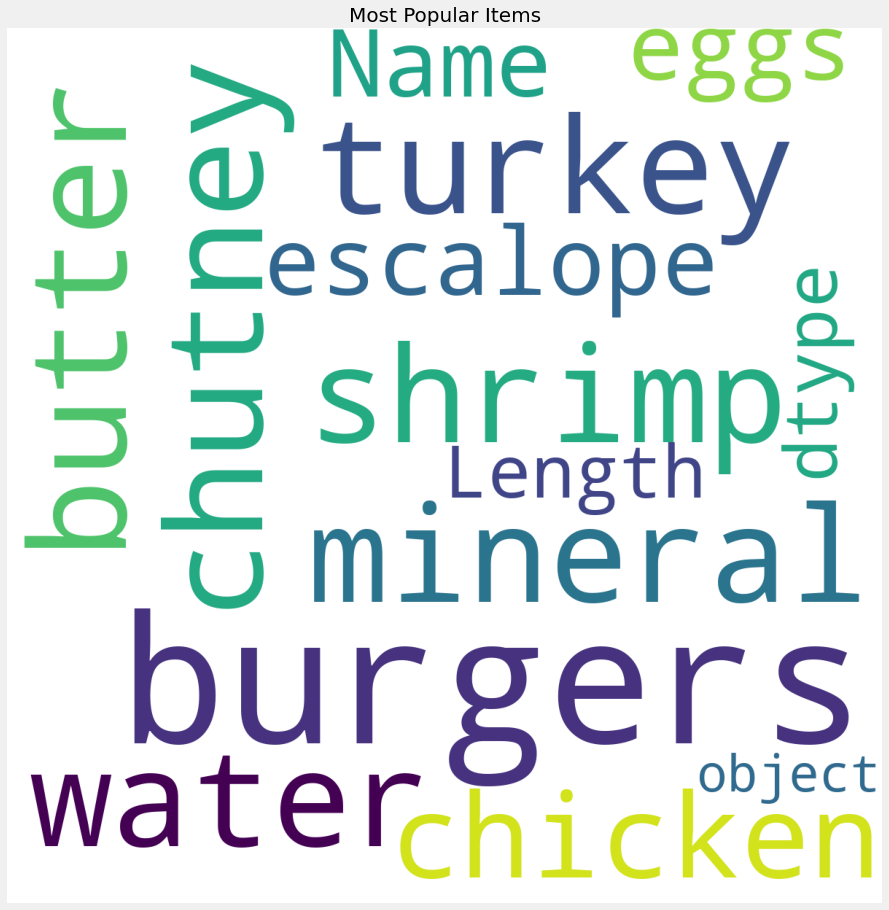

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

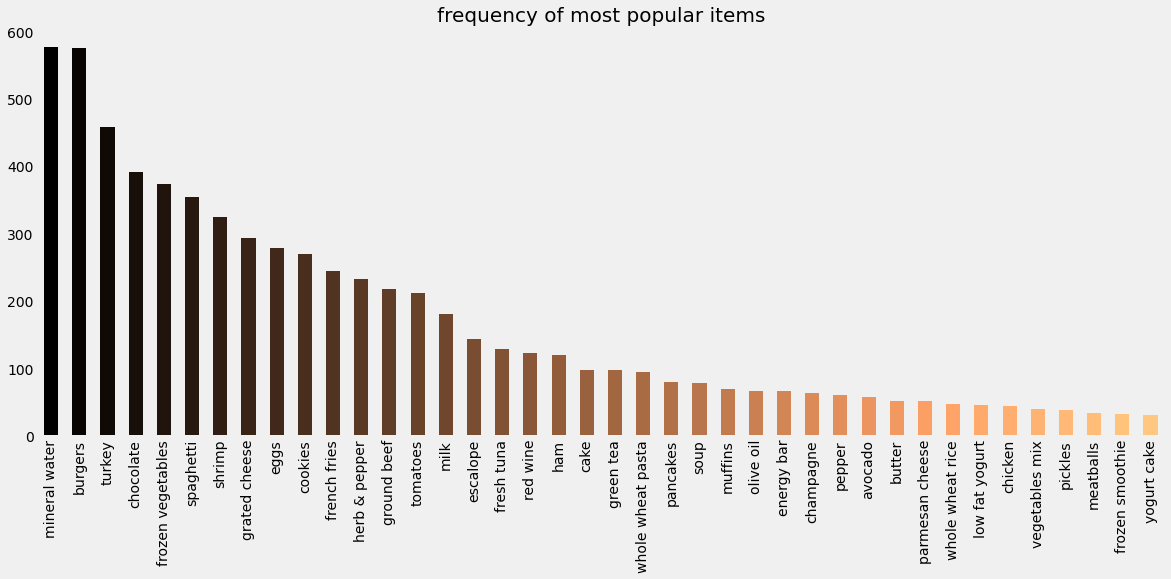

In [11]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [12]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'olive oil',
       'energy bar', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'yams', 'tomato sauce', 'oil', 'strawberries'],
      dtype='object')

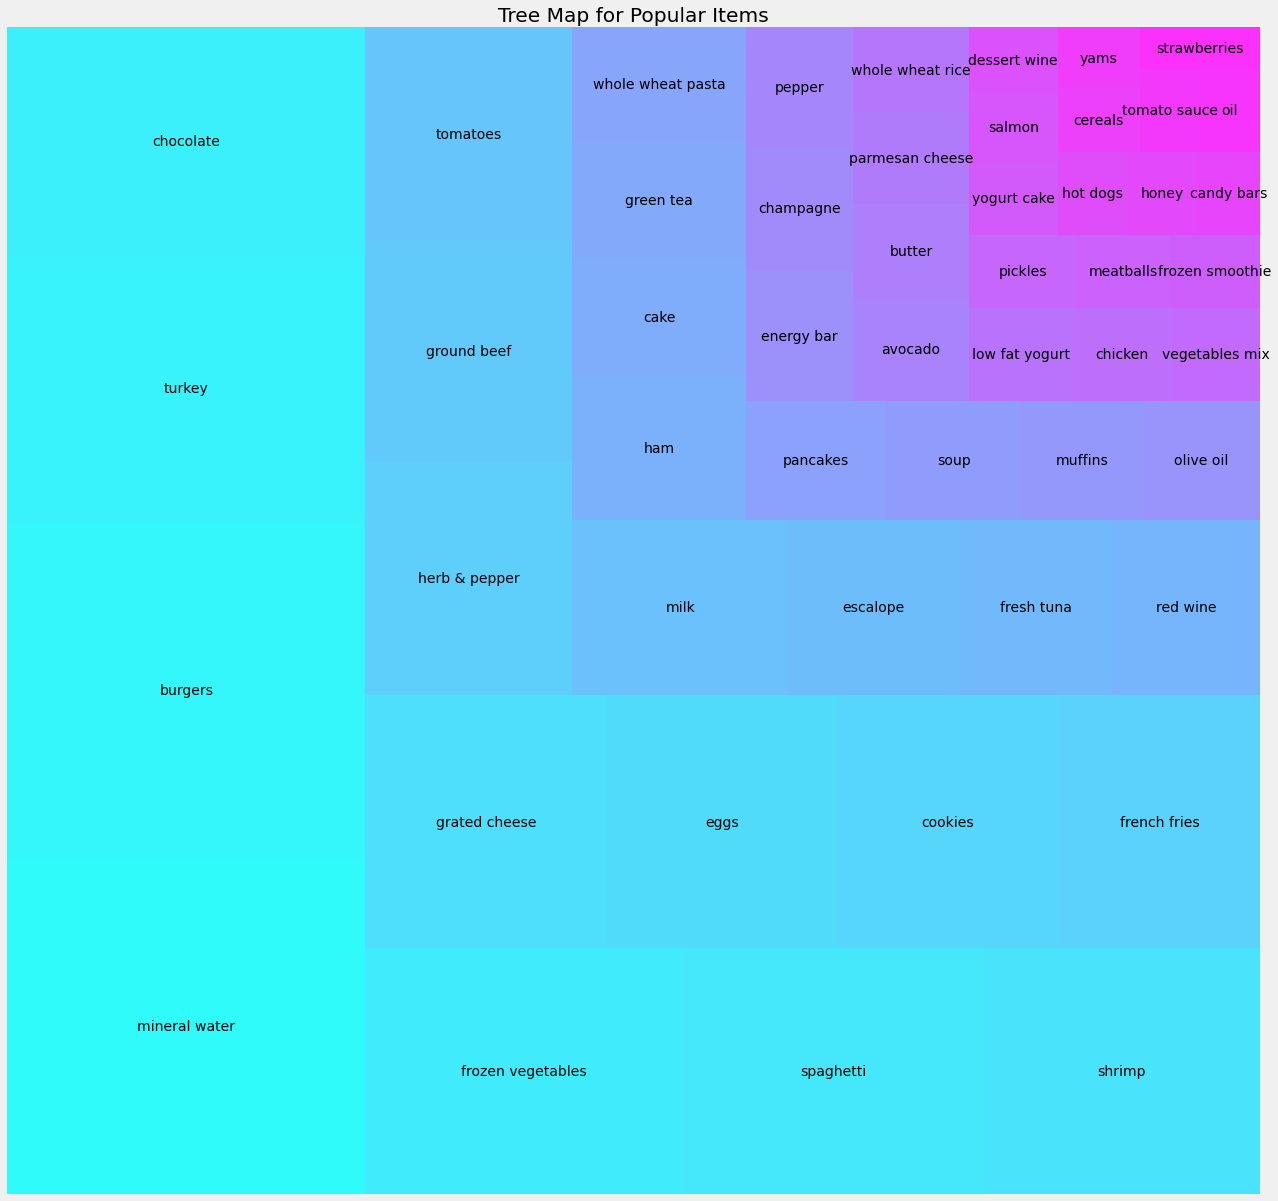

In [14]:
# plotting a tree map
import squarify
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [15]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

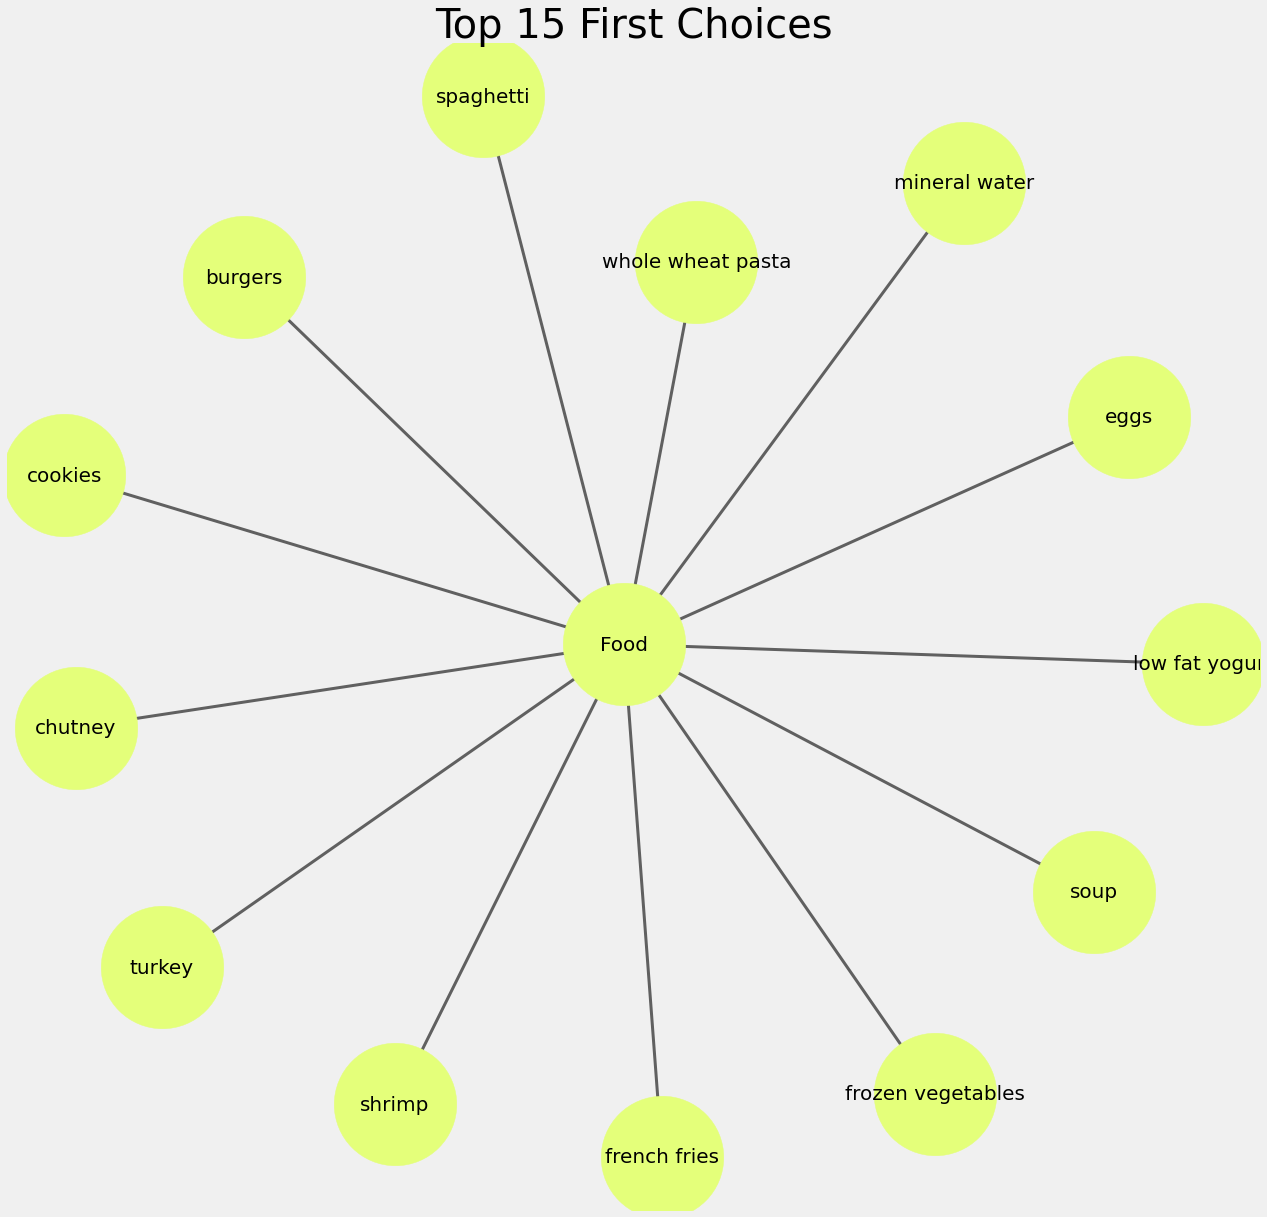

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [17]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

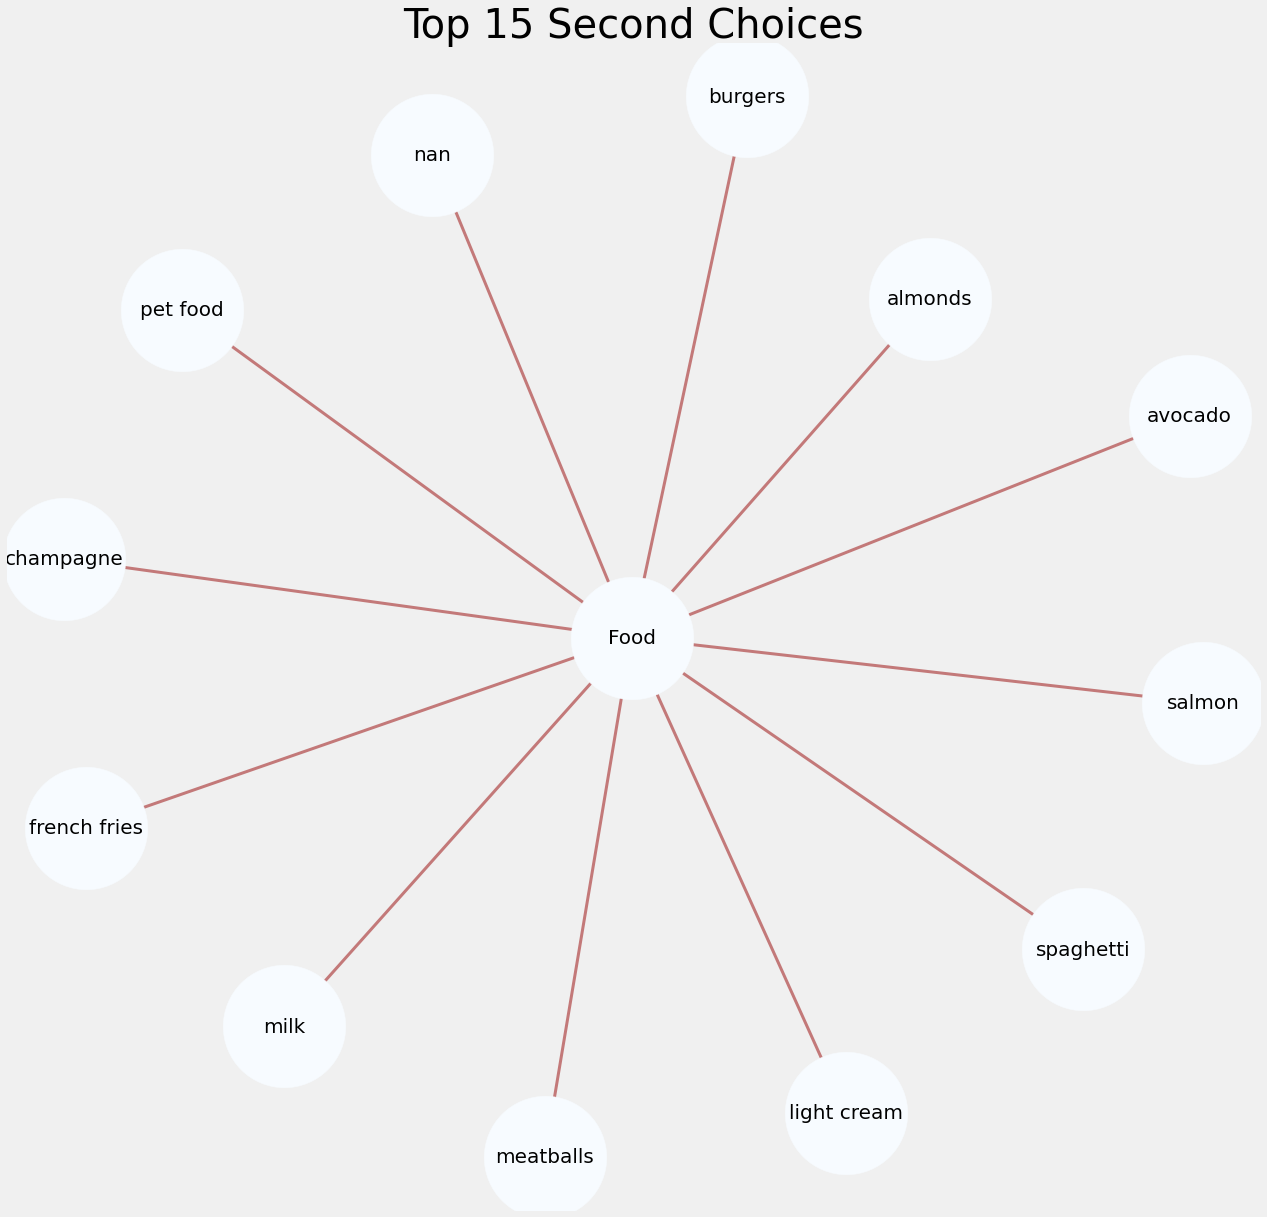

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [19]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

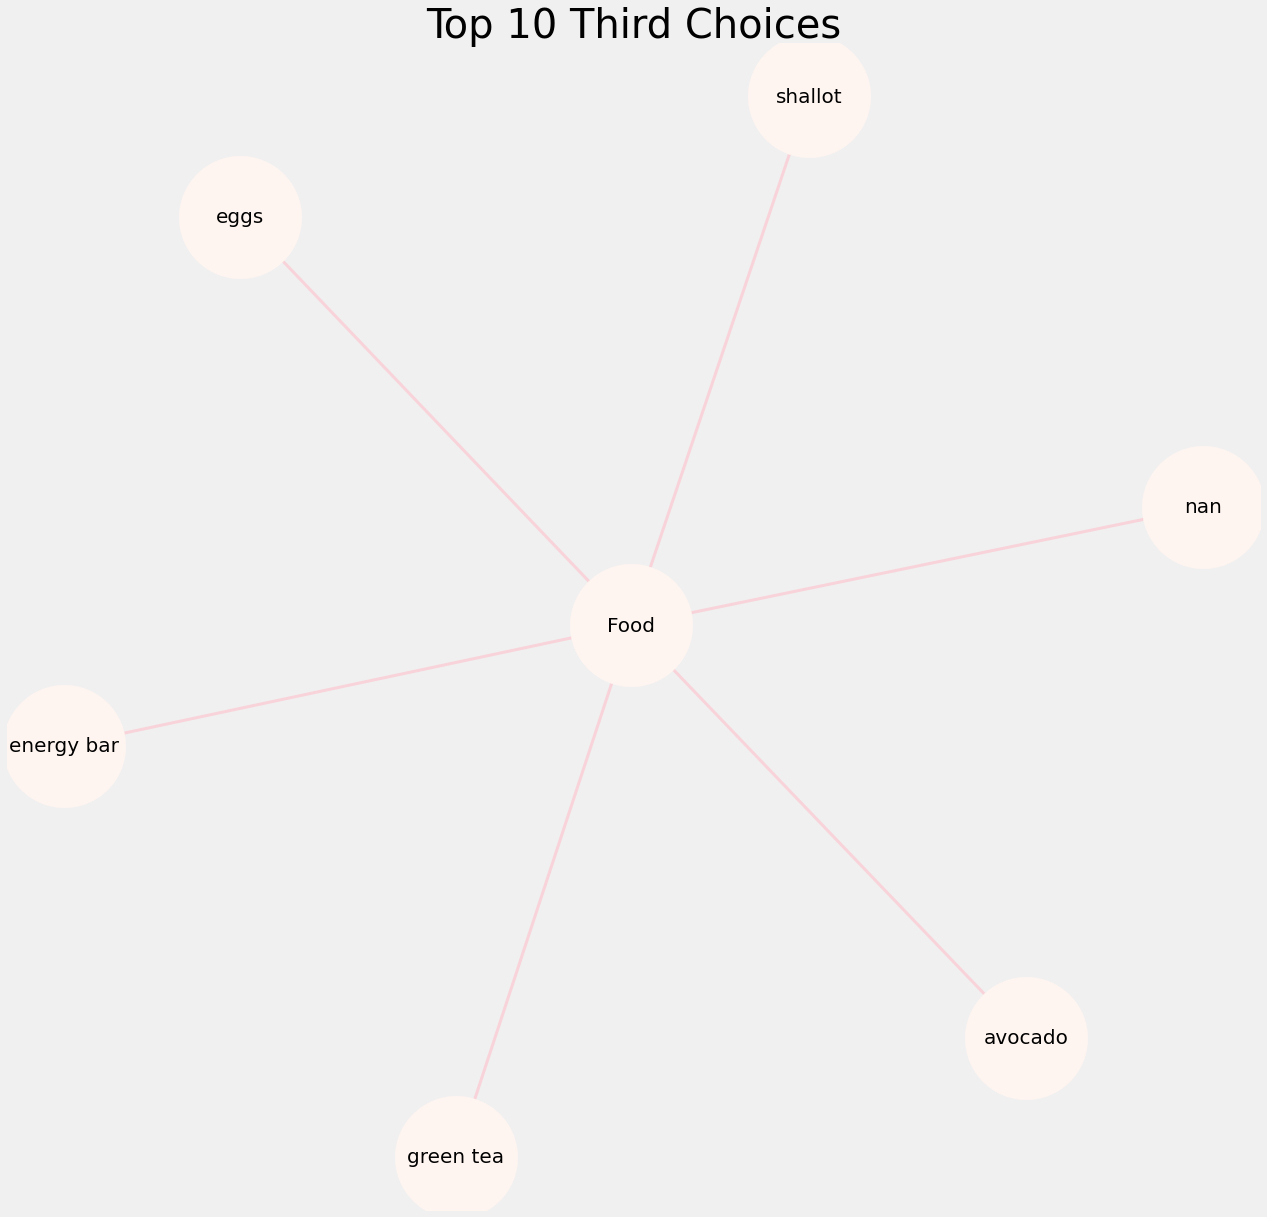

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

In [21]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [23]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

(7501, 40)

In [24]:
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [25]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,french fries,herb & pepper,ground beef,tomatoes,milk,escalope,fresh tuna,red wine,ham,cake,green tea,whole wheat pasta,pancakes,soup,muffins,energy bar,olive oil,champagne,avocado,pepper,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [26]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(ground beef, eggs, mineral water)"
205,0.013065,"(milk, eggs, mineral water)"
206,0.011065,"(ground beef, milk, mineral water)"
207,0.010532,"(chocolate, eggs, spaghetti)"


In [27]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [28]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(spaghetti, mineral water)",2
26,0.050927,"(eggs, mineral water)",2


In [29]:
# getting th item sets with length = 1 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [30]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(eggs, mineral water)",2


In [31]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238368,(mineral water),1


In [32]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

,support,itemsets,length
13,0.129583,(milk),1


In [33]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
22,0.059992,(chicken),1


In [34]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [35]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1
